### Plotting class boundaries

Explanation of the code 

    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap  
    import numpy as np
    
    V1=0 #X0
    V2=2 #X1

    X1, X2 = np.meshgrid(np.arange(start = X[:, V1].min() - 1, stop = X[:, V1].max() + 1, step = 0.01), np.arange(start = X[:, V2].min() - 1, stop = X[:, V2].max() + 1, step = 0.01))  
    
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'blue','green'))  )
    
    plt.xlim(X1.min(), X1.max())  
    plt.ylim(X2.min(), X2.max())  
    
    for i, j in enumerate(np.unique(iris.target)):  
        plt.scatter(X[iris.target == j, V1], X[iris.target == j, V2],  
                    c = ['red','blue','lightgreen'][i], label = j)  
    plt.title('Naive Bayes (Training set)')  
    plt.xlabel('X0')  
    plt.ylabel('X1')  
    plt.legend()  
    plt.show()

X stores the data set and X[:, V1] stores the attribute at column V1

**meshgrid** has these parameters below that creates all the X1, X2 points that is used for plotting the map.

start=X[:, V1].min() - 1, 
stop =X[:, V1].max() + 1
step =0.01

start=X[:, V2].min() - 1, 
stop=X[:, V2].max() + 1
step =0.01


Let's see what meshgrid does:


In [3]:
import numpy as np

X1,X2=np.meshgrid(np.arange(-1,2,1),np.arange(-1,2,1))
print(X1)
print(X2)

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


**meshgrid** method in numpy creates a co-ordinate matrix of the 2d coordinates. The rectangular(mesh) is formed whose length is x1_max-x1_min and breadth is x2_max-x2_min.

What does ravel do? It flattens the matrix. 

In [4]:
np.array([X1.ravel(), X2.ravel()])

array([[-1,  0,  1, -1,  0,  1, -1,  0,  1],
       [-1, -1, -1,  0,  0,  0,  1,  1,  1]])

After transpose, you get a pair of coordinates on the graph. 

In [5]:
np.array([X1.ravel(), X2.ravel()]).T

array([[-1, -1],
       [ 0, -1],
       [ 1, -1],
       [-1,  0],
       [ 0,  0],
       [ 1,  0],
       [-1,  1],
       [ 0,  1],
       [ 1,  1]])

The coordinates are fed to a predictor class that returns the class value:

    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

The class values will be mapped according to the cmap and plotted by the **plt.contourf(..)** function.

plt.scatter prints the individual data points according to the class value and color

### Example

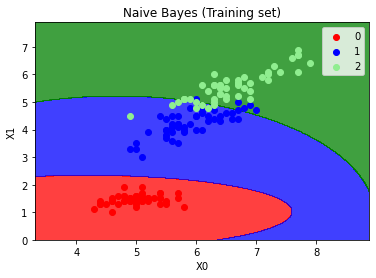

In [6]:
from sklearn import datasets
from matplotlib.colors import ListedColormap  
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np

# import iris data 
iris = datasets.load_iris()

#create classifier
gb=GaussianNB()
gb.fit(iris.data[:,(0,2)], iris.target)


V1=0 #X0
V2=2 #X1

X1, X2 = np.meshgrid(np.arange(start = iris.data[:, V1].min() - 1, stop = iris.data[:, V1].max() + 1, step = 0.01),  
                     np.arange(start = iris.data[:, V2].min() - 1, stop = iris.data[:, V2].max() + 1, step = 0.01))  
plt.contourf(X1, X2, gb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.75, cmap = ListedColormap(('red', 'blue','green'))  )
plt.xlim(X1.min(), X1.max())  
plt.ylim(X2.min(), X2.max())  
for i, j in enumerate(np.unique(iris.target)):  
    plt.scatter(iris.data[iris.target == j, V1], iris.data[iris.target == j, V2],  
                c = ['red','blue','lightgreen'][i], label = j)  
plt.title('Naive Bayes (Training set)')  
plt.xlabel('X0')  
plt.ylabel('X1')  
plt.legend()  
plt.show()

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])